In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


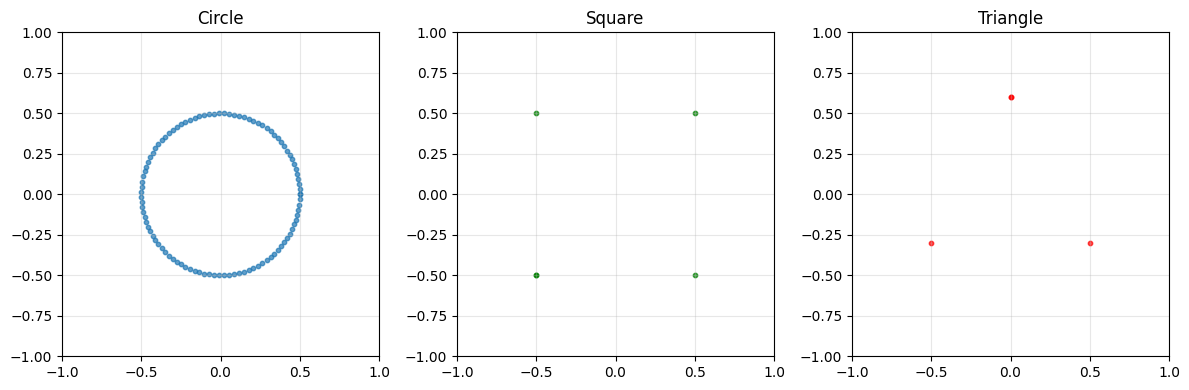

In [2]:
def create_2d_shapes():
    theta = np.linspace(0, 2*np.pi, 100)
    circle = np.array([np.cos(theta), np.sin(theta)]).T * 0.5
    square = np.array([[-0.5, -0.5], [-0.5, 0.5], [0.5, 0.5], [0.5, -0.5], [-0.5, -0.5]])
    triangle = np.array([[0, 0.6], [-0.5, -0.3], [0.5, -0.3], [0, 0.6]])
    return circle, square, triangle

circle, square, triangle = create_2d_shapes()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].scatter(circle[:, 0], circle[:, 1], s=10, alpha=0.7)
axes[0].set_title('Circle')
axes[1].scatter(square[:, 0], square[:, 1], s=10, alpha=0.7, color='green')
axes[1].set_title('Square')
axes[2].scatter(triangle[:, 0], triangle[:, 1], s=10, alpha=0.7, color='red')
axes[2].set_title('Triangle')
for ax in axes:
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Part 2: The Forward Process - Adding Noise

In [3]:
class ForwardDiffusion:
    def __init__(self, steps=50):
        self.steps = steps
        self.betas = np.linspace(0.01, 0.3, steps)
        self.alphas = 1 - self.betas
        self.alpha_bars = np.cumprod(self.alphas)
    
    def add_noise(self, x, t):
        noise = np.random.randn(*x.shape)
        sqrt_alpha_bar = np.sqrt(self.alpha_bars[t])
        sqrt_one_minus_alpha_bar = np.sqrt(1 - self.alpha_bars[t])
        noisy_x = sqrt_alpha_bar * x + sqrt_one_minus_alpha_bar * noise
        return noisy_x, noise

### Visualize the Forward Process

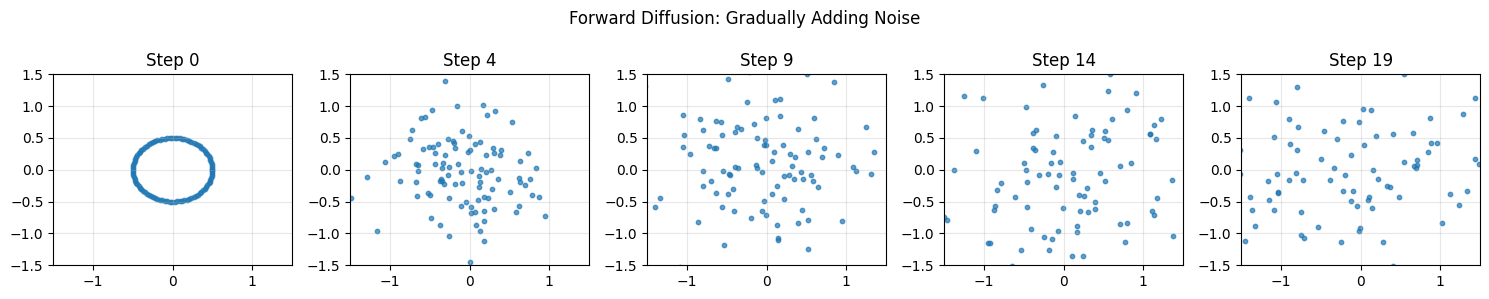

In [4]:
forward = ForwardDiffusion(steps=20)
key_steps = [0, 4, 9, 14, 19]

fig, axes = plt.subplots(1, len(key_steps), figsize=(15, 3))
for i, step_idx in enumerate(key_steps):
    if step_idx == 0:
        step = circle
    else:
        step, _ = forward.add_noise(circle, step_idx-1)
    axes[i].scatter(step[:, 0], step[:, 1], s=10, alpha=0.7)
    axes[i].set_title(f'Step {step_idx}')
    axes[i].set_xlim(-1.5, 1.5)
    axes[i].set_ylim(-1.5, 1.5)
    axes[i].grid(True, alpha=0.3)
plt.suptitle('Forward Diffusion: Gradually Adding Noise')
plt.tight_layout()
plt.show()

## Part 3: The Reverse Process - Removing Noise

In [5]:
class SimpleDenoiser:
    def __init__(self, forward_process):
        self.forward = forward_process
        
    def denoise_step(self, x_t, t):
        if t == 0:
            return x_t
        denoised = x_t * 0.9 + np.random.randn(*x_t.shape) * 0.1
        return denoised

## Part 4: Generate New Shapes!

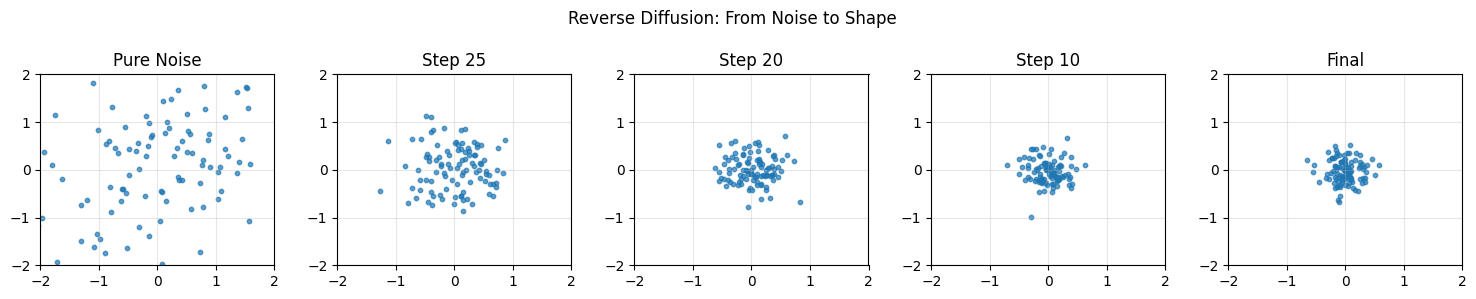

In [6]:
def generate_shape(forward, denoiser, shape_type='circle'):
    shapes = {'circle': circle, 'square': square, 'triangle': triangle}
    target_shape = shapes[shape_type]
    
    noise = np.random.randn(*target_shape.shape)
    reverse_steps = []
    current = noise.copy()
    
    for t in reversed(range(forward.steps)):
        current = denoiser.denoise_step(current, t)
        if t % (forward.steps // 4) == 0 or t < 5:
            reverse_steps.append((t, current.copy()))
    
    return noise, current, reverse_steps

forward = ForwardDiffusion(steps=30)
denoiser = SimpleDenoiser(forward)

noise_start, generated_shape, steps = generate_shape(forward, denoiser, 'circle')

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
step_titles = ['Pure Noise', 'Step 25', 'Step 20', 'Step 10', 'Final']

for i, title in enumerate(step_titles):
    if i == 0:
        axes[i].scatter(noise_start[:, 0], noise_start[:, 1], s=10, alpha=0.7)
    elif i < len(steps):
        t, points = steps[i]
        axes[i].scatter(points[:, 0], points[:, 1], s=10, alpha=0.7)
    else:
        axes[i].scatter(generated_shape[:, 0], generated_shape[:, 1], s=10, alpha=0.7)
    axes[i].set_title(title)
    axes[i].set_xlim(-2, 2)
    axes[i].set_ylim(-2, 2)
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Reverse Diffusion: From Noise to Shape')
plt.tight_layout()
plt.show()

## Part 5: Experiment with Different Parameters

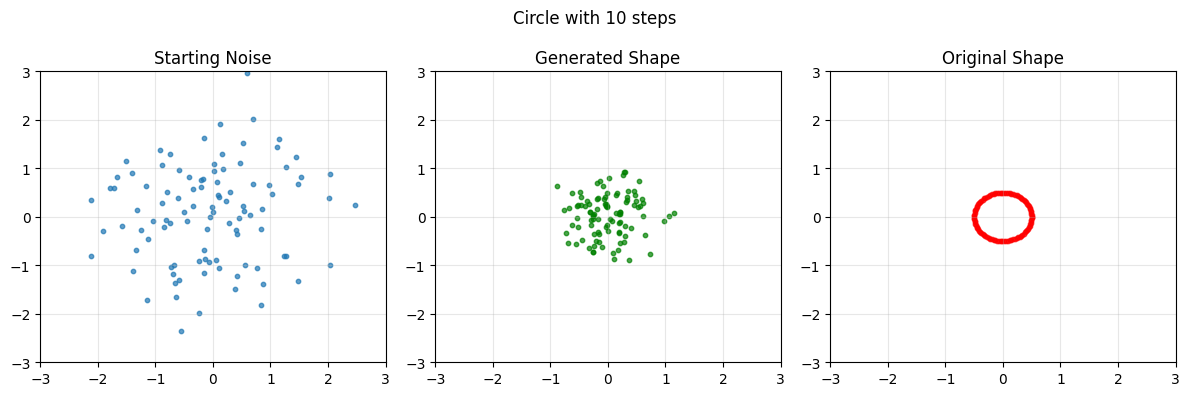

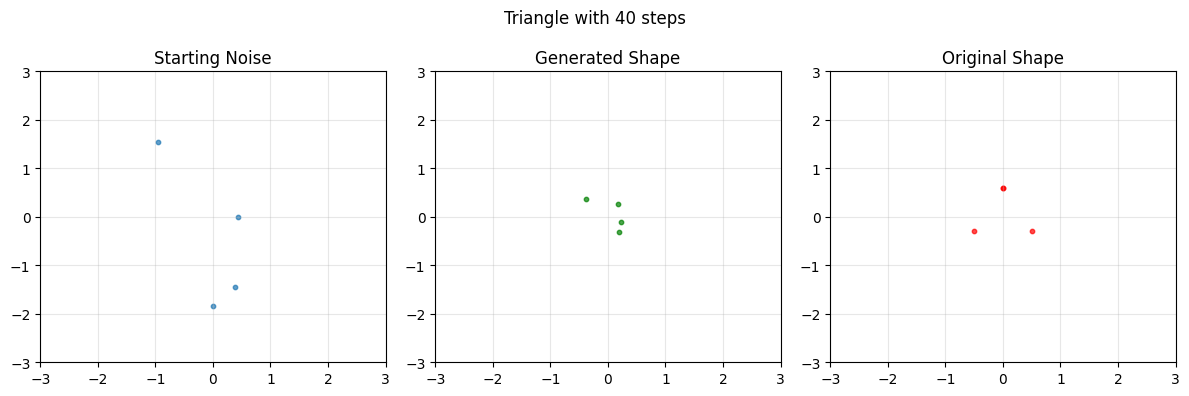

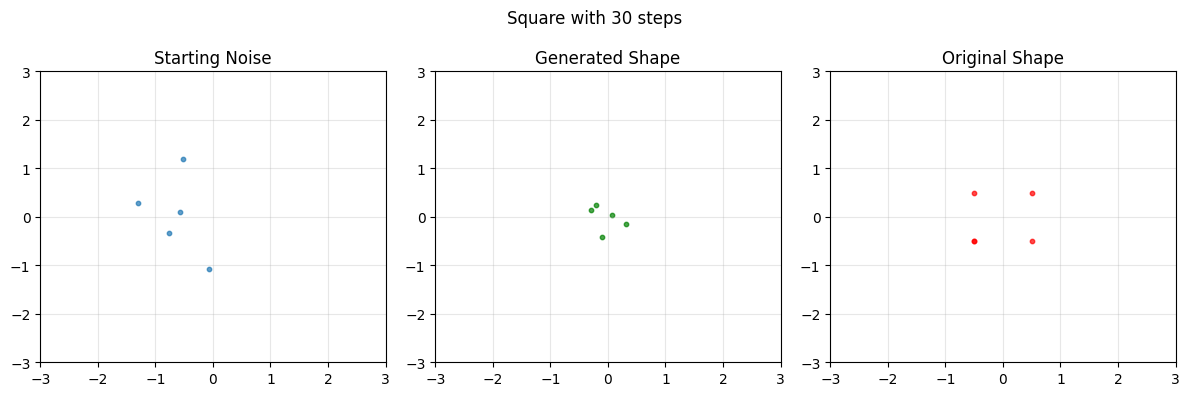

In [7]:
def experiment_with_parameters(steps=20, shape_type='square'):
    exp_forward = ForwardDiffusion(steps=steps)
    exp_denoiser = SimpleDenoiser(exp_forward)
    noise, result, _ = generate_shape(exp_forward, exp_denoiser, shape_type)
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].scatter(noise[:, 0], noise[:, 1], s=10, alpha=0.7)
    axes[0].set_title('Starting Noise')
    axes[1].scatter(result[:, 0], result[:, 1], s=10, alpha=0.7, color='green')
    axes[1].set_title('Generated Shape')
    
    shapes = {'circle': circle, 'square': square, 'triangle': triangle}
    axes[2].scatter(shapes[shape_type][:, 0], shapes[shape_type][:, 1], s=10, alpha=0.7, color='red')
    axes[2].set_title('Original Shape')
    
    for ax in axes:
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        ax.grid(True, alpha=0.3)
    
    plt.suptitle(f'{shape_type.capitalize()} with {steps} steps')
    plt.tight_layout()
    plt.show()

experiment_with_parameters(steps=10, shape_type='circle')
experiment_with_parameters(steps=40, shape_type='triangle')
experiment_with_parameters(steps=30, shape_type='square')